In [1]:
from astropy.io import fits

In [2]:
imageFile1='WFI.2008-12-09T07_33_11.202.fits'
hdu_list = fits.open(imageFile1)
hdu_list.info()

Filename: WFI.2008-12-09T07_33_11.202.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     720   ()      
  1  WIN1.CHIP1.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  2  WIN1.CHIP2.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  3  WIN1.CHIP3.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  4  WIN1.CHIP4.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  5  WIN1.CHIP8.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  6  WIN1.CHIP7.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  7  WIN1.CHIP6.OUT1    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   
  8  WIN1.CHIP5.OUT2    1 ImageHDU        52   (2142, 4128)   int16 (rescales to uint16)   


In [3]:
head = hdu_list[0].header

In [4]:
print(head['DATE'])
print(head['OBJECT'])
print(head['EXPTIME'])

2008-12-09T07:36:14.448
M78
179.9175


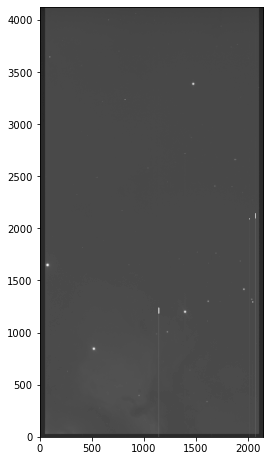

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
image =hdu_list[3].data
fig, ax= plt.subplots(1,1, figsize=(4, 8))
ax.imshow(image, cmap='gray', norm=LogNorm(),origin='lower')

In [ ]:
import numpy as np
print(np.min(image),np.mean(image),np.max(image),np.std(image))
print(np.quantile(image,[0.005,0.01,0.5,0.99,0.995]))

In [ ]:
import astropy.io.ascii as ascii
data = ascii.read('HD40307_HARPS03_DRS-3-5.rdb',data_start=2)
data

In [ ]:
data.keys()

In [ ]:
data['rjd']

In [ ]:
for i in range(len(data['rjd'])):
 print('%10.4f %10.4f %10.4f'%(data['rjd'][i],data['vrad'][i],data['svrad'][i]))

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1, figsize=(12, 6), sharex=True)
ax.plot(data['rjd'], data['vrad'],'.',color='blue')
ax.errorbar(data['rjd'], data['vrad'], yerr=data['svrad'],fmt='none',color='blue')
ax.axhline(np.median(data['vrad']),linestyle='dashed')

In [ ]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1, figsize=(6, 6))
ax.plot(data['rhk'], data['vrad'],'.',color='blue')
ax.axhline(np.median(data['rhk']),linestyle='dashed')
ax.axvline(np.median(data['vrad']),linestyle='dashed')

In [ ]:
print(np.min(data['vrad']),np.mean(data['vrad']),np.max(data['vrad']),np.std(data['vrad']))
print(np.quantile(data['vrad'],[0.005,0.01,0.5,0.99,0.995]))